In [85]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import matplotlib
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [86]:
consumer_key = "kBIedcEXC8Xl7zJEb8mYlXdmX"
consumer_secret = "OuP0HHVBZH0SIulIjjqkollD1WBiubXyvrwuxRIdJqWdgYi5TM"
access_token = "983862551497723904-GHta0xgYwz2xidN5fjzhA32wKfPQH6B"
access_token_secret = "c7ZSliFSfvLkSKrGvgQTogQF9OxLw2dzZISmDE4ZoFVCG"

In [87]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())

In [94]:
lang = "en"
target="PlotBot Analyze"
#tuple to hold to stop repeating
Tuple_screenname_tweettarget=[]


def sentiment_analyse():
    appended_results=[]
    counter=-1
    oldest_tweet=None
    
    
    
    #count=1, it returns only one search
    public_tweets = api.search(target, count=1,result_type="recent")
    
    for tweet in public_tweets['statuses']:
        
        #print(tweet)
        tweet_id = tweet["id"]
        tweet_author=tweet['user']['screen_name'] 
        raw_text=tweet["text"]
        raw_text_split=raw_text.split(":")
        keyword_to_analyze=raw_text_split[1]
        
        if (tweet_author,keyword_to_analyze) not in Tuple_screenname_tweettarget:
            
            Tuple_screenname_tweettarget_tuple=(tweet_author,keyword_to_analyze )
            Tuple_screenname_tweettarget.append(Tuple_screenname_tweettarget_tuple)
            
            for x in range(5):
                tweets_keyword = api.search(keyword_to_analyze, max_id=oldest_tweet,count=100,lang=lang)
            
                for tweet_1 in tweets_keyword["statuses"]:
                    tweet_text=tweet_1['text']
                    
                    vader_analysis = analyzer.polarity_scores(tweet_text)
                    compound=vader_analysis['compound']
                    positive=vader_analysis['pos']
                    negative=vader_analysis['neg']
                    neutral=vader_analysis['neu']
                    
                    results = {
                   "Date":tweet['created_at'], 
                   "Keyword": keyword_to_analyze,
                   "Compound Score": compound,
                   "Postive Score": positive,
                   "Neutral Score": neutral,
                   "Negative Score": negative,
                   "Tweets Ago":counter
                    }
                    counter=counter-1
                    appended_results.append(results)
                    oldest_tweet=tweet_1['id']-1
        
            analysis_plot(appended_results)
            api.update_with_media("Analysis.png",f"New Tweet Analysis: {keyword_to_analyze}(Requested by @{tweet_author})",in_reply_to_status_id=tweet_id)
    
        elif (tweet_author,keyword_to_analyze) in Tuple_screenname_tweettarget:
            print("Already analyzed")
    
    #unless u mention the user name with @ symbol, it doesnt refelect in replying    

In [95]:
def analysis_plot(appended_results):
    
    df=pd.DataFrame(appended_results)
    y_axis=df["Compound Score"]
    x_axis=df["Tweets Ago"]
    x_axis_max=np.max(x_axis)
    x_axis_min=np.min(x_axis)
    
    plt.plot(x_axis,y_axis,marker='o', linewidth=0.5,label="Tweets" + "\n"+ df['Keyword'][2],color="lightsalmon")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 0.9),mode="Extended")
    now=datetime.now()
    now=now.strftime("%Y-%m-%d %H:%M")
    plt.xlim(x_axis_min, x_axis_max)
    plt.xlabel("Tweets Ago")
    plt.ylabel("Tweet Polarity")
    plt.title(f"Sentiment Analysis of tweets ({now})")
    plt.grid()
    plt.savefig("Analysis.png", bbox_inches='tight')
    

{'statuses': [{'created_at': 'Wed Apr 11 17:49:30 +0000 2018', 'id': 984126308992016389, 'id_str': '984126308992016389', 'text': '@PlotBot Analyze: @tcs_news', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'plotbot', 'name': 'Plotbot', 'id': 17582138, 'id_str': '17582138', 'indices': [0, 8]}, {'screen_name': 'TCS_News', 'name': 'TCS', 'id': 2502801, 'id_str': '2502801', 'indices': [18, 27]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 17582138, 'in_reply_to_user_id_str': '17582138', 'in_reply_to_screen_name': 'plotbot', 'user': {'id': 1392344198, 'id_str': '1392344198', 'name': 'Dhiraj Kumar Deka', 'screen_name': 'DhirajKD', 'location': 'Guwahati, India', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'pro

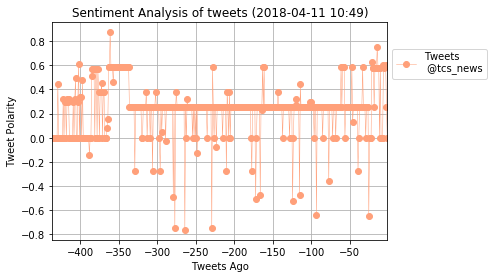

In [101]:

while(True):
    sentiment_analyse()
  
    time.sleep(300)
    

    